# Функции

Говоря простыми словами, **функция** является способом группирования набора операторов, позволяющим выполнять их более одного раза в программе — упакованной процедурой, вызываемой по имени. **Функции** способны вычислять результирующее значение и также дают возможность указывать параметры, которые служат входными данными **функции** и могут отличаться при каждом выполнении кода. Кодирование операции как **функции** делает ее в целом полезным инструментом, который можно использовать в разнообразных контекстах.

По существу **функции** предлагают альтернативу программированию путем вырезания и вставки — вместо того, чтобы иметь множество избыточных копий кода операции, мы можем вынести его в единственную **функцию**. Тем самым мы радикально сокращаем объем будущей работы: если позже операцию потребуется модифицировать, то нам придется вносить изменения только в одиночную копию кода **функции**, а не в многочисленные копии, разбросанные по всей программе.

**Функции** также представляют собой наиболее базовую программную структуру Python, которая предназначена для доведения до максимума многократного использования кода и подводит нас к более широким понятиям проектирования программ. Как будет показано, **функции** позволяют разбивать сложные системы на поддающиеся управлению части. За счет реализации каждой части в виде **функции** мы делаем ее многократно применяемой и легкой для кодирования.

Хотя и не очень формально, но в предшествующих уроках мы уже применяли несколько функций. Скажем, мы использовали встроенную функцию len, чтобы запросить количество элементов в объекте коллекции.

В этом уроке мы выясним, как писать новые функции в Python. Написанные нами функции ведут себя подобно встроенным функциям, которые мы уже видели: они вызываются в выражениях, принимают значения и возвращают результаты. Но написание новых функций требует приложения ряда дополнительных идей, которые пока еще не были представлены. Кроме того, функции в Python ведут себя совершенно не так, как в компилируемых языках вроде С. Ниже предлагается краткое введение в главные концепции, лежащие в основе функций Python:


- **def является исполняемым кодом.** Функции Python пишутся с помощью нового оператора def. В отличие от функций в компилируемых языках, таких как С, def представляет собой исполняемый оператор — ваша функция не существует до тех пор, пока Python не встретит и не выполнит def. В действительности законно (и подчас удобно) вкладывать операторы def внутрь операторов if, циклов while и даже других def. При типовом применении операторы def помещаются в файлы модулей и естественным образом выполняются для генерациифункций, когда файл модуля, где они находятся, импортируется в первый раз.


- **def создает объект и присваивает его имени.** Когда Python достигает и выполняет оператор def, генерируется новый объект функции, который присваивается имени функции. Как и со всеми присваиваниями, имя функции становится ссылкой на объект функции. С именем функции не связано ничего магического — вы увидите, что объект функции можно присваивать другим именам, сохранять в списке и т.п. Объекты функций также могут иметь произвольные определяемые пользователем атрибуты, присоединяемые к ним для регистрации данных.


- **lambda создает объект, но возвращает его в качестве результата.** Функции можно также создавать с помощью выражения lambda — средства, которое позволяет встраивать определения функций в места, где оператор def синтаксически не допускается.


- **return отправляет результирующий объект вызывающему коду.** Когда функция вызывается, вызывающий код приостанавливается до тех пор, пока функция не завершит свою работу и не возвратит управление обратно. Функции, которые вычисляют значение, посылают его вызывающему коду посредством оператора return; возвращенное значение становится результатом вызова функции. Оператор return без значения просто возвращает управление в вызывающий код (и отправляет стандартный результат None).


- **yield отправляет результирующий объект вызывающему коду, но запоминает место, где он остановился.** В функциях, известных как генераторы, можно также использовать оператор yield, чтобы посылать обратно значение и предохранять их состояние, так что они смогут возобновлять работу позже для производства серии результатов с течением времени. Это еще одна сложная тема, которая раскрывается в последующих главах данной части книги.


- **global объявляет переменные уровня модуля, предназначенные для присваивания.** По умолчанию все имена, присваиваемые в функции, являются локальными для функции и существуют только во время ее выполнения. Чтобы присвоить значение имени из включающего модуля, необходимо указать его в операторе global внутри функции. В более общем смысле имена всегда ищутся в областях видимости — местах хранения переменных — и присваивания привязывают имена к областям видимости.


- **nonlocal объявляет переменные объемлющей функции, предназначенные для присваивания.** Подобным образом оператор nonlocal, появившийся в Python З.Х, позволяет функции присваивать имя, которое существует в области видимости синтаксически объемлющего оператора def. В итоге объемлющие функции могут служить местом сохранения состояния, т.е. информации, запоминаемой между вызовами функции, без потребности в применении разделяемых глобальных имен.


- **Аргументы передаются по присваиванию (по ссылкам на объекты).** В Python аргументы передаются функциям по присваиванию (которое, как вы знаете, означает ссылку на объект). Вы увидите, что в модели Python вызывающий код и функция разделяют объекты по ссылкам, но псевдонимы имен отсутствуют. Изменение имени аргумента внутри функции не приводит к изменению соответствующего имени в вызывающем коде, но модификация на месте переданных изменяемых объектов может изменить объекты, разделяемые с вызывающим кодом, и служит результатом функции.


- **Аргументы передаются по позиции, если только не указано иначе.** Значения, передаваемые вызову функции, по умолчанию сопоставляются с именами аргументов в определении функции слева направо. Ради гибкости вызовам функций можно также передавать аргументы по имени с помощью синтаксиса ключевых слов имя=значение и распаковывать произвольно много аргументов для отправки посредством снабжения аргументов звездочками — \* - позиционные аргурменты и  \*\* - ключевые аргурменты. Определения функций используют те же две формы для указания стандартных значений аргументов и сбора произвольно большого количества получаемых аргументов.


- **Аргументы, возвращаемые значения и переменные не объявляются.** Как и абсолютно все в Python, на функции не налагается никаких ограничений по типам. Фактически объявлять заранее о чем-либо, касающемся функции, не нужно: можно передавать аргументы любого типа, возвращать объект любого вида и т.д. Отсюда следует, что единственный вызов функции часто может применяться к разнообразным типам объектов — подойдут любые объекты, которые поддерживают совместимый интерфейс (методы и операции выражений), независимо от их специфических типов.

## Операторы def
Оператор def создает объект функции и присваивает его имени. Общий формат def выглядит следующим образом:

• def имя(аргумент1г аргумент2, . . . аргументы) :
    
    операторы


Подобно всем составным операторам Python оператор def состоит из строки заголовка, за которой идет блок операторов, обычно с отступом (или одиночный оператор после двоеточия). Блок операторов становится шелом функции, т.е. кодом, который Python выполняет каждый раз, когда функция позже вызывается.

В строке заголовка def указывается имя функции, которому присваивается объект функции, а также список из нуля и более аргументов (иногда называемых параметрами) в круглых скобках. Именам аргументов в заголовке присваиваются объекты, передаваемые в круглых скобках в точке вызова.

Тело функции часто содержит оператор return:

def имя {аргумент 1, аргумент2, . . . аргументы) :
    
    return значение


Оператор return в Python может появляться где угодно в теле функции; по достижении он заканчивает вызов функции и посылает результат обратно вызывающему коду. Оператор return состоит из необязательного выражения с объектным значением, которое дает результат функции. Если значение опущено, тогда return отправляет обратно None.
Оператор return сам по себе также необязателен; если он отсутствует, то выход из функции происходит, когда поток управления достигает конца тела функции.Формально функция без оператора return автоматически возвращает объект None, но такое возвращаемое значение обычно при вызове игнорируется.

In [3]:
# Пример создания функции

def multiply(x, y):
    return x * y

print(multiply(10, 2))
print(multiply(23, 35))

20
805


In [8]:
# Переопределение функции 

def multiply(x, y):
    return x * y

m = multiply

print(m(10, 10))

100


In [13]:
# Нельзя определить несколько функиций с одинаковым именем, чтобы все функции можно было использовать

def multiply(x, y):
    return x * y

def multiply(x, y):
    return x / y

print(multiply(20, 10))

2.0


## Встроенные функции Python


**bool(x)** - преобразование к типу bool, использующая стандартную процедуру проверки истинности. Если х является ложным или опущен, возвращает значение False, в противном случае она возвращает True.

**bytearray([источник [, кодировка [ошибки]]])** - преобразование к bytearray. Bytearray - изменяемая последовательность целых чисел в диапазоне 0≤X<256. Вызванная без аргументов, возвращает пустой массив байт.

**bytes([источник [, кодировка [ошибки]]])** - возвращает объект типа bytes, который является неизменяемой последовательностью целых чисел в диапазоне 0≤X<256. Аргументы конструктора интерпретируются как для bytearray().

**complex([real[, imag]])** - преобразование к комплексному числу.

**dict([object])** - преобразование к словарю.

**float([X])** - преобразование к числу с плавающей точкой. Если аргумент не указан, возвращается 0.0.

**frozenset([последовательность])** - возвращает неизменяемое множество.

**int([object], [основание системы счисления])** - преобразование к целому числу.

**list([object])** - создает список.

**memoryview([object])** - создает объект memoryview.

**object()** - возвращает безликий объект, являющийся базовым для всех объектов.

**range([start=0], stop, [step=1])** - арифметическая прогрессия от start до stop с шагом step.

**set([object]**) - создает множество.

**slice([start=0], stop, [step=1])** - объект среза от start до stop с шагом step.

**str([object], [кодировка], [ошибки])** - строковое представление объекта. Использует метод __str__.

**tuple(obj)** - преобразование к кортежу.

**abs(x) - Возвращает абсолютную величину (модуль числа).

**all(последовательность)** - Возвращает True, если все элементы истинные (или, если последовательность пуста).

**any(последовательность)** - Возвращает True, если хотя бы один элемент - истина. Для пустой последовательности возвращает False.

**ascii(object)** - Как repr(), возвращает строку, содержащую представление объекта, но заменяет не-ASCII символы на экранированные последовательности.

**bin(x)** - Преобразование целого числа в двоичную строку.

**callable(x)** - Возвращает True для объекта, поддерживающего вызов (как функции).

**chr(x)** - Возвращает односимвольную строку, код символа которой равен x.

**classmethod(x)** - Представляет указанную функцию методом класса.

**compile(source, filename, mode, flags=0, dont_inherit=False)** - Компиляция в программный код, который впоследствии может выполниться функцией eval или exec. Строка не должна содержать символов возврата каретки или нулевые байты.

**delattr(object, name)** - Удаляет атрибут с именем 'name'.

**dir([object])** - Список имен объекта, а если объект не указан, список имен в текущей локальной области видимости.

**divmod(a, b)** - Возвращает частное и остаток от деления a на b.

**enumerate(iterable, start=0)** - Возвращает итератор, при каждом проходе предоставляющем кортеж из номера и соответствующего члена последовательности.

**eval(expression, globals=None, locals=None)** - Выполняет строку программного кода.

**exec(object[, globals[, locals]])** - Выполняет программный код на Python.

**filter(function, iterable)** - Возвращает итератор из тех элементов, для которых function возвращает истину.

**format(value[,format_spec])** - Форматирование (обычно форматирование строки).

**getattr(object, name ,[default])** - извлекает атрибут объекта или default.

**globals()** - Словарь глобальных имен.

**hasattr(object, name)** - Имеет ли объект атрибут с именем 'name'.

**hash(x)** - Возвращает хеш указанного объекта.

**help([object])** - Вызов встроенной справочной системы.

**hex(х)** - Преобразование целого числа в шестнадцатеричную строку.

**id(object)** - Возвращает "адрес" объекта. Это целое число, которое гарантированно будет уникальным и постоянным для данного объекта в течение срока его существования.

**input([prompt])** - Возвращает введенную пользователем строку. Prompt - подсказка пользователю.

**isinstance(object, ClassInfo)** - Истина, если объект является экземпляром ClassInfo или его подклассом. Если объект не является объектом данного типа, функция всегда возвращает ложь.

**issubclass(класс, ClassInfo)** - Истина, если класс является подклассом ClassInfo. Класс считается подклассом себя.

**iter(x)** - Возвращает объект итератора.

**len(x)** - Возвращает число элементов в указанном объекте.

**locals()** - Словарь локальных имен.

**map(function, iterator)** - Итератор, получившийся после применения к каждому элементу последовательности функции function.

**max(iter, [args ...] * [, key])** - Максимальный элемент последовательности.

**min(iter, [args ...] * [, key])** - Минимальный элемент последовательности.

**next(x)** - Возвращает следующий элемент итератора.

**oct(х)** - Преобразование целого числа в восьмеричную строку.

**open(file, mode='r', buffering=None, encoding=None, errors=None, newline=None, closefd=True)** - Открывает файл и возвращает соответствующий поток.

**ord(с)** - Код символа.

**pow(x, y[, r])** - ( x ** y ) % r.

**reversed(object)** - Итератор из развернутого объекта.

**repr(obj)** - Представление объекта.

**print([object, ...], *, sep=" ", end='\n', file=sys.stdout)** - Печать.

**property(fget=None, fset=None, fdel=None, doc=None)**

**round(X [, N])** - Округление до N знаков после запятой.

**setattr(объект, имя, значение)** - Устанавливает атрибут объекта.

**sorted(iterable[, key][, reverse])** - Отсортированный список.

**staticmethod(function)** - Статический метод для функции.

**sum(iter, start=0)** - Сумма членов последовательности.

**super([тип [, объект или тип]])** - Доступ к родительскому классу.

**type(object)** - Возвращает тип объекта.

**type(name, bases, dict)** - Возвращает новый экземпляр класса name.

**vars([object])** - Словарь из атрибутов объекта. По умолчанию - словарь локальных имен.

**zip(*iters)** - Итератор, возвращающий кортежи, состоящие из соответствующих элементов аргументов-последовательностей.

Более подробно по [ссылке](https://pythoner.name/documentation/library/functions)

# Анонимные функции: выражения lambda

Помимо оператора def в Python также предлагается форма выражения, генерирующая объекты функций. Из-за сходства с инструментом в языке Lisp она называется lambda1. Подобно def такое выражение создает функцию, которая будет вызываться позже, но возвращает сам объект функции, не присваивая его имени. По этой причи не выражения lambda иногда называют анонимными (т.е. безымянными) функциями. На практике они часто применяются для того, чтобы встроить определение функции в строку или отложить выполнение порции кода

Общая форма **lambda** выглядит как ключевое слово lambda, за которым следует один или больше аргументов (очень похоже на список аргументов, заключенный в круглые скобки в заголовке def) и далее выражение после двоеточия:

*lambda аргумент1, аргумент2, . . . аргументы :* выражение, использующее аргументы.

Объекты функций, возвращаемые выражениями lambda, работают в точности как объекты функций, создаваемые и присваиваемые операторами def, но существует несколько отличий, которые делают выражения lambda полезными в специализированных ролях.

- **lambda представляет собой выражение, а не оператор.** По этой причине выражение lambda может находиться в местах, где оператор def не разрешен синтаксисом Python — скажем, внутри спискового литерала или в аргументах вызова функции. В случае def на функции можно ссылаться по именам, но они должны быть созданы где-то в другом месте. Как выражение, lambda возвращает значение (новую функцию), которую дополнительно можно присвоить имени. Напротив, оператор def всегда присваивает новую функцию имени в своем заголовке вместо возвращения ее в виде результата.

- **Тело lambda является одиночным выражением, а не блоком операторов.** Тело lambda похоже на то, что было бы указано в операторе return внутри тела def; вы просто набираете результат как обычное выражение, не возвращая его явно. Из-за ограничения только выражением тело lambda менее универсально, чем def — вы можете помещать в тело lambda лишь определенную логику, неиспользующую операторы вроде if. Так было задумано, чтобы ограничить вложенность в программе: выражение lambda предназначено для записи простых функций, а оператор def поддерживает более крупные задачи.

### Для чего используется выражение lambda?

Вообще говоря, выражение lambda полезно как своего рода краткое условное обозначение функции, которое позволяет встраивать определение функции внутрь кода, где оно применяется. Выражение lambda совершенно необязательно — вы всегда можете вместо него использовать оператор def и должны поступать так, если функция требует мощи полных операторов, которую выражение lambda не способно легко предоставить. Но в сценариях, где нужно всего лишь встраивать небольшие порции исполняемого кода в местах их применения, выражения lambda окажутся более простыми кодовыми конструкциями.

In [15]:
# Пример создание lambda-функции


mul = lambda x, y: x * y
    
print(mul(10, 5))

50


In [24]:
# Использование filter совместно с lambda-функцией


numbers = list(range(50))

new_numbers = list(filter(lambda x: ((x + 5) ** 2) % 3 == 0, numbers))

print(new_numbers)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]


In [25]:
# Использование filter совместно с map-функцией


numbers = list(range(50))

new_numbers = list(map(lambda x: x ** 3 // 2, numbers))

print(new_numbers)

[0, 0, 4, 13, 32, 62, 108, 171, 256, 364, 500, 665, 864, 1098, 1372, 1687, 2048, 2456, 2916, 3429, 4000, 4630, 5324, 6083, 6912, 7812, 8788, 9841, 10976, 12194, 13500, 14895, 16384, 17968, 19652, 21437, 23328, 25326, 27436, 29659, 32000, 34460, 37044, 39753, 42592, 45562, 48668, 51911, 55296, 58824]


# Аргументы функции

Ранее упоминалось, что аргументы передаются по присваиванию. В итоге возникает несколько последствий, не всегда очевидных новичкам, которые будут раскрыты в настоящем разделе. Ниже приведено краткое изложение
ключевых аспектов передачи аргументов функциям.

- Аргументы передаются путем автоматического присваивания объектов именам локальных переменных. Аргументы функций, т.е. ссылки на (возможно) разделяемые объекты, отправленные вызывающим кодом, представляют собой еще один пример присваивания Python в действии. Поскольку ссылки реализованы в виде указателей, все аргументы в действительности передаются через указатели. Объекты, передаваемые как аргументы, никогда автоматически не копируются.


- Присваивание именам аргументов внутри функции не затрагивает вызывающий код. Когда функция выполняется, имена аргументов в заголовке функции становятся новыми локальными именами в области видимости функции. Никакого совмещения имен аргументов функции и имен переменных в области видимости вызывающего кода не происходит.


- Модификация внутри функции аргумента, являющегося изменяемым объектом, может затронуть вызывающий код. С другой стороны, так как аргументам просто присваиваются передаваемые объекты, в функциях можно модифицировать переданные изменяемые объекты на месте, в результате оказывая влияние на вызывающий код. Изменяемые аргументы могут служить входными и выходными данными для функций. Схема передачи по присваиванию Python — не совсем то же самое, что и ссылочные параметры C++, но на практике она очень похожа на модель передачи аргументов в С (и других языках).


- Неизменяемые аргументы фактически передаются “по значению”. Объекты, подобные целым числам и строкам, передаются по ссылке на объекты, а не путем копирования, но из-за того, что модифицировать на месте неизменяемые объекты невозможно, эффект во многом похож на создание копий.


- Изменяемые аргументы фактически передаются “по указателю”. Объекты вроде списков и словарей также передаются по ссылке на объекты, что аналогично способу передачи массивов как указателей в языке С — изменяемые объекты можно модифицировать на месте в функции почти как массивы в С. Разумеется, если вы никогда не использовали язык С, то режим передачи аргументов в Python вам покажется еще более простым — он влечет за собой только присваивание объектов именам и работает одинаково для изменяемых и неизменяемых объектов.

Прежде чем углубляться в детали синтаксиса, следует подчеркнуть, что эти специальные режимы необязательны и имеют дело только с сопоставлением объектов с именами; лежащим в основе механизмом после того, как сопоставление произошло, по-прежнему является присваивание. В действительности некоторые инструменты такого рода предназначены в большей степени для тех, кто создает библиотеки, а не для разработчиков приложений. Но поскольку вы можете столкнуться с данными режимами, даже если сами не применяете их в своем коде, ниже представлен краткий обзор
доступных инструментов.

**Позиционные:** сопоставляются слева направо. Нормальный сценарий, который мы главным образом использовали до сих пор, предусматривает сопоставление переданных значений аргументов с именами аргументов в заголовке функции по позиции, слева направо.

**Ключевые:** сопоставляются по имени аргумента. В качестве альтернативы в вызывающем коде можно указывать, какой аргументв функции получает значение, за счет применения имени аргумента в вызове посредством синтаксиса имя=значение.

**Стандартные:** указывают значения для необязательных аргументов, которым значения не передавались. Сами функции могут задавать стандартные значения для аргументов, которые они получат, если в вызове передается слишком мало значений, снова с использованием синтаксиса имя-значение.

**Сбор переменного количества аргументов:** собирает произвольно много позиционных и ключевых аргументов. В функциях могут применяться специальные аргументы, предваренные одним или двумя символами \*, для сбора произвольного количества возможных добавочных аргументов. Такую возможность часто называют переменным, количеством
аргументов (varargs) в честь списка аргументов переменной длины в языке С; в Python аргументы собираются в нормальный объект.


**Распаковка переменного количества аргументов:** передает произвольно много позиционных и ключевых аргументов.
В вызывающем коде синтаксис \* можно также использовать для распаковки коллекций аргументов в отдельные аргументы. Это противоположность \* в заголовке функции — синтаксис \* в заголовке означает сбор произвольно большого числа аргументов, тогда как в вызове он означает распаковку произвольно большого количества аргументов и их передачу по отдельности как обособленных значений.

**Аргументы с передачей только по ключевым словам:** аргументы, которые должны передаваться по имени. В Python З.Х (но не в Python 2.Х) функции также допускают указание аргументов, которые должны передаваться по имени с помощью ключевых аргументов, а не по позиции. Такие аргументы обычно применяются для определения конфигурационных параметров в дополнение к фактическим аргументам.

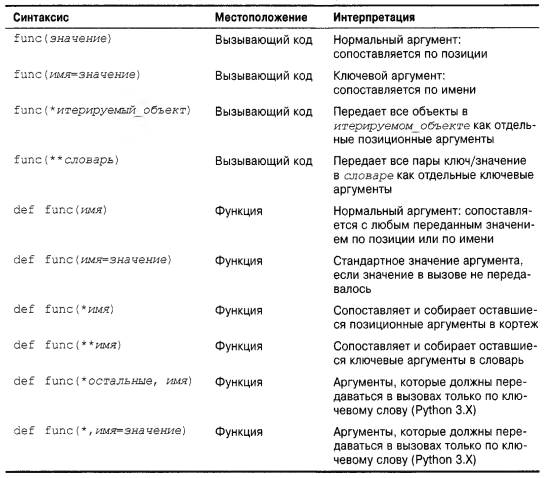

In [32]:
# Примеры функций с аргументами

def test_func(a, b, c, *d):
    return a + b + c + sum(d)


print(test_func(3, 4, 5, 6, 7, 8))

33


In [36]:
# Примеры функций с аргументами

def test_func(a, b, c=3):
    return a + b + c


print(test_func(1, 1, 1))
print(test_func(1, 1))

3
5


In [46]:
# Распаковка

d = [1, 2, 3]

a, b, c = d

print(a, b, c)

d_2 = [1, 2, 3, 4, 5, 6]

a_2, b_2, *c_2 = d_2

print(a_2, b_2, c_2)


1 2 3
1 2 [3, 4, 5, 6]


In [49]:
# Пример с ключевым аргументом

def test_func(**d):
    return d


print(test_func(x=1, y=4, z=37))

{'x': 1, 'y': 4, 'z': 37}


# Область видимости

Вот краткий обзор  правил областей видимости Python правил а.к.а. LEGB.

L – Local. Включает в себя имена (идентификатор / переменные), указанные в функции (с использованием def или lambda), а не объявляются с помощью ключевого слова global.

E – Enclosing. Включает в себя имя из локальной области видимости объемлющих функций  (например, с использованием def или lambda).

G – Global. Включает в себя имена, работающих на верхнем уровне модуля или определенных с помощью ключевого слова global.

B – Built-in . Встроенные встроенные функции, такие как print, input, open и т.д


[Более подробно про область видимости](https://medium.com/nuances-of-programming/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%B0-%D0%B8%D0%BC%D0%B5%D0%BD-%D0%B8-%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8-%D0%B2%D0%B8%D0%B4%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8-%D0%B2-python-daf7fcddbaba)

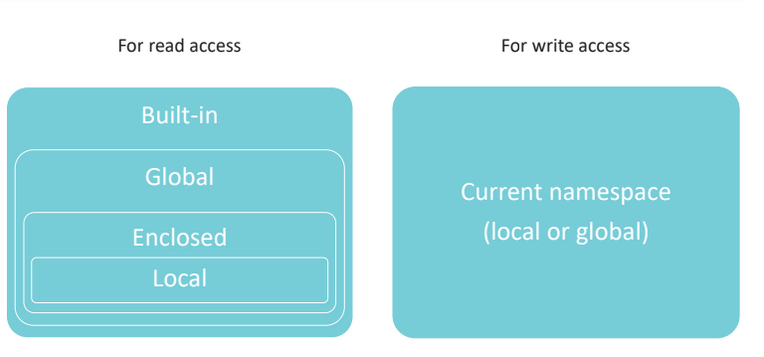

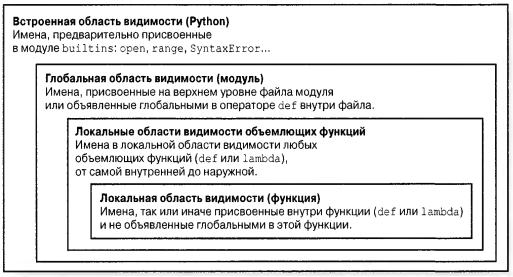

# Рекурсивные функции

**Рекурсия** — довольно сложная тема и ее относительно редко можно встретить в Python, отчасти из-за того, что процедурные операторы Python включают более простые циклические структуры. И все же знать о рекурсии полезно, т.к. она позволяет программам обходить структуры, которые имеют произвольные и непредсказуемые формы и глубины, например, при планировании маршрутов в путешествии, анализе языка и прохождении по ссылкам в веб-сети. Рекурсия даже является альтернативой несложным циклам и итерациям, хотя не обязательно более простой или эффективной.

**Рекурсивная функция** — это та, которая вызывает сама себя.

In [51]:
# Пример рекурсии факториал числа

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

print(factorial(5))

120


# Замыкания

Для начала обратимся к википедии: “замыкание (closure) в программировании — это функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся ее параметрами.” Перед тем как перейти к рассмотрению примеров реализации замыканий на Python, для начал вспомним тему “область видимости переменных”. Обычно, по области видимости, переменные делят на глобальные и локальные. Глобальные существует в течении всего времени выполнения программы, а локальные создаются внутри методов, функций и прочих блоках кода, при этом, после выхода из такого блока переменная удаляется из памяти.

[Замыкания YouTube](https://www.youtube.com/watch?v=wKyUZY4-Dxc&list=PLlWXhlUMyooYqypXIju-5czBtppKaWimP&index=8)

In [3]:
# Пример замыкания

def func():
    x = ['one', 'two']
    
    def inner():
        print(x)
        print(id(x))
        
    return inner

new_func = func()

new_func()

print(dir(new_func))

print(new_func.__closure__)
print(new_func.__closure__[0])

print(dir(new_func.__closure__[0]))
      
a = new_func.__closure__[0].cell_contents
      
print(a)
print(id(a))
      
a.append('three')
      
print(a)
print(id(a))
      
new_func()

['one', 'two']
139956412526336
['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
(<cell at 0x7f4a24455c40: list object at 0x7f4a2440af00>,)
<cell at 0x7f4a24455c40: list object at 0x7f4a2440af00>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'cell_contents']
['one', 'two']
139956412526336
['one', 'two', 'three']
13